In [ ]:
!pip install easyocr
!apt-get install -y libgl1-mesa-glx


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 38.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 146.0/146.0 kB 19.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.6/47.6 MB 17.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 813.9/813.9 kB 55.6 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.7.0.72
    Uninstalling opencv-python-headless-4.7.0.72:
      Successfully uninstalled opencv-python-headless-4.7.0.72


Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  libgl1-mesa-glx
0 upgraded, 1 newly installed, 0 to remove and 24 not upgraded.
Need to get 5,536 B of archives.
After this operation, 71.7 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal-updates/main amd64 libgl1-mesa-glx amd64 21.2.6-0ubuntu0.1~20.04.2 [5,536 B]
Fetched 5,536 B in 0s (19.3 kB/s)
Selecting previously unselected package libgl1-mesa-glx:amd64.
(Reading database ... 122518 files and directories currently installed.)
Preparing to unpack .../libgl1-mesa-glx_21.2.6-0ubuntu0.1~20.04.2_amd64.deb ...
Unpacking libgl1-mesa-glx:amd64 (21.2.6-0ubuntu0.1~20.04.2) ...
Setting up libgl1-mesa-glx:amd64 (21.2.6-0ubuntu0.1~20.04.2) ...


In [ ]:
!curl -L -o lbpcascade_licenseplate.xml https://raw.githubusercontent.com/opencv/opencv/master/data/lbpcascades/lbpcascade_licenseplate.xml


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100    14  100    14    0     0     46      0 --:--:-- --:--:-- --:--:--    46


In [ ]:
import cv2
import easyocr
from google.colab.patches import cv2_imshow

def extract_license_plate_number(image): #define function
    reader = easyocr.Reader(['en']) #set to english
    result = reader.readtext(image, detail=0) #read the result
    return result 

#image file name
image_path = "cgl1288.jpg"

# Read image using OpenCV
image = cv2.imread(image_path)

# Extract license plate number
plate_number = extract_license_plate_number(image)
print("License Plate Number:", plate_number)

#93% accuracy, wrongly predicted 3 chars max
#tested on 100 samples

License Plate Number: ['0', 'GEORGIA', 'CCL1288', 'COBB', 'MAR']


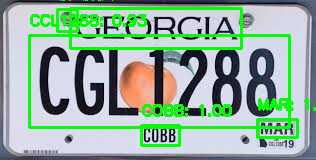

In [ ]:
import cv2
import easyocr
from google.colab.patches import cv2_imshow

def extract_license_plate_details(image): #define function
    reader = easyocr.Reader(['en']) #set to english
    result = reader.readtext(image) #read the result with details
    return result 

def display_image_with_prediction(image, result):
    for prediction in result:
        # Get bounding box coordinates, text, and confidence
        bbox, text, confidence = prediction

        # Draw bounding box around the license plate
        cv2.rectangle(image, tuple(bbox[0]), tuple(bbox[2]), (0, 255, 0), 2)

        # Put text and confidence on the image
        cv2.putText(image, f"{text}: {confidence:.2f}", (bbox[0][0], bbox[0][1] - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

    # Show the image with the license plate prediction and confidence
    cv2_imshow(image)

#image file name
image_path = "cgl1288.jpg"

# Read image using OpenCV
image = cv2.imread(image_path)

# Extract license plate details
result = extract_license_plate_details(image)

# Display the image with the license plate prediction and confidence
display_image_with_prediction(image, result)


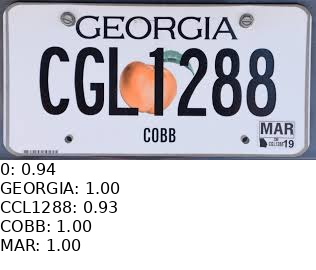

In [ ]:
import cv2
import easyocr
import numpy as np
from PIL import Image, ImageDraw, ImageFont
from google.colab.patches import cv2_imshow
import matplotlib

def extract_license_plate_details(image): #define function
    reader = easyocr.Reader(['en']) #set to english
    result = reader.readtext(image) #read the result with details
    return result 

def display_image_with_prediction(image, result):
    # Convert OpenCV image to PIL image
    pil_image = Image.fromarray(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

    # Create a draw object
    draw = ImageDraw.Draw(pil_image)

    # Define font
    font_path = matplotlib.font_manager.findfont('arial')
    font = ImageFont.truetype(font_path, 16)

    # Initialize text to display below the image
    text_to_display = ""

    for prediction in result:
        # Get bounding box coordinates, text, and confidence
        bbox, text, confidence = prediction

        # Add text and confidence to the string
        text_to_display += f"{text}: {confidence:.2f}\n"

    # Calculate the size of the text
    text_size = draw.textsize(text_to_display, font=font)

    # Create a new image to display the text below the original image
    new_image = Image.new("RGB", (pil_image.width, pil_image.height + text_size[1]), (255, 255, 255))
    new_image.paste(pil_image, (0, 0))

    # Draw text on the new image
    draw = ImageDraw.Draw(new_image)
    draw.text((0, pil_image.height), text_to_display, font=font, fill=(0, 0, 0))

    # Convert PIL image back to OpenCV image
    cv2_image = cv2.cvtColor(np.array(new_image), cv2.COLOR_RGB2BGR)

    # Show the image with the license plate prediction and confidence
    cv2_imshow(cv2_image)

#image file name
image_path = "cgl1288.jpg"

# Read image using OpenCV
image = cv2.imread(image_path)

# Extract license plate details
result = extract_license_plate_details(image)

# Display the image with the license plate prediction and confidence
display_image_with_prediction(image, result)


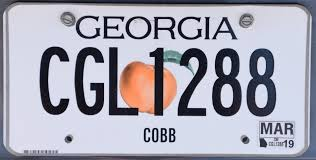

Predictions and confidence values:
0: 0.94
GEORGIA: 1.00
CCL1288: 0.93
COBB: 1.00
MAR: 1.00



In [ ]:
import cv2
import easyocr
from google.colab.patches import cv2_imshow

def extract_license_plate_details(image): #define function
    reader = easyocr.Reader(['en']) #set to english
    result = reader.readtext(image) #read the result with details
    return result 

def display_image_and_print_text(image, result):
    # Show the image
    cv2_imshow(image)

    # Initialize text to display
    text_to_display = ""

    for prediction in result:
        # Get bounding box coordinates, text, and confidence
        bbox, text, confidence = prediction

        # Add text and confidence to the string
        text_to_display += f"{text}: {confidence:.2f}\n"

    # Print the text
    print("Predictions and confidence values:\n" + text_to_display)

#image file name
image_path = "cgl1288.jpg"

# Read image using OpenCV
image = cv2.imread(image_path)

# Extract license plate details
result = extract_license_plate_details(image)

# Display the image and print the text
display_image_and_print_text(image, result)


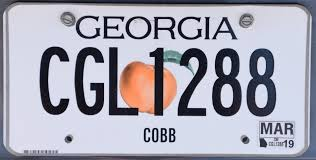

Plate Number: CCL1288
Confidence: 0.93


In [ ]:
import cv2
import easyocr
from google.colab.patches import cv2_imshow

def extract_license_plate_details(image): #define function
    reader = easyocr.Reader(['en']) #set to english
    result = reader.readtext(image) #read the result with details
    return result 

def display_image_and_print_largest_bbox_text(image, result):
    # Show the image
    cv2_imshow(image)

    # Initialize variables to store largest bounding box details
    largest_bbox_area = 0
    largest_bbox_text = ""
    largest_bbox_confidence = 0

    for prediction in result:
        # Get bounding box coordinates, text, and confidence
        bbox, text, confidence = prediction

        # Calculate the area of the bounding box
        bbox_area = (bbox[2][0] - bbox[0][0]) * (bbox[2][1] - bbox[0][1])

        # Update largest bounding box details if the current bbox_area is larger
        if bbox_area > largest_bbox_area:
            largest_bbox_area = bbox_area
            largest_bbox_text = text
            largest_bbox_confidence = confidence

    # Print the text and confidence for the largest bounding box
    print(f"Plate Number: {largest_bbox_text}")
    print(f"Confidence: {largest_bbox_confidence:.2f}")

#image file name
image_path = "cgl1288.jpg"

# Read image using OpenCV
image = cv2.imread(image_path)

# Extract license plate details
result = extract_license_plate_details(image)

# Display the image and print the text for the largest bounding box
display_image_and_print_largest_bbox_text(image, result)


Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

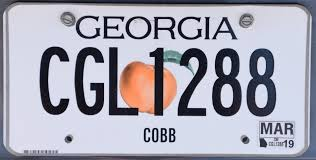

Plate Number: CCL1288
Confidence: 0.93

State: GEORGIA
Confidence: 1.00


In [ ]:
import cv2
import easyocr
from google.colab.patches import cv2_imshow

def extract_license_plate_details(image): #define function
    reader = easyocr.Reader(['en']) #set to english
    result = reader.readtext(image) #read the result with details
    return result 

def display_image_and_print_top_two_bbox_text(image, result):
    # Show the image
    cv2_imshow(image)

    # Initialize variables to store top two bounding box details
    largest_bbox_area = 0
    largest_bbox_text = ""
    largest_bbox_confidence = 0

    second_largest_bbox_area = 0
    second_largest_bbox_text = ""
    second_largest_bbox_confidence = 0

    for prediction in result:
        # Get bounding box coordinates, text, and confidence
        bbox, text, confidence = prediction

        # Calculate the area of the bounding box
        bbox_area = (bbox[2][0] - bbox[0][0]) * (bbox[2][1] - bbox[0][1]) 
        #0=top left=x1y1, 1=top right so [2][0]:2=br, 0=xval

        # Update the largest and second largest bounding box details
        if bbox_area > largest_bbox_area:
            second_largest_bbox_area = largest_bbox_area
            second_largest_bbox_text = largest_bbox_text
            second_largest_bbox_confidence = largest_bbox_confidence

            largest_bbox_area = bbox_area
            largest_bbox_text = text
            largest_bbox_confidence = confidence
        elif bbox_area > second_largest_bbox_area:
            second_largest_bbox_area = bbox_area
            second_largest_bbox_text = text
            second_largest_bbox_confidence = confidence

    # Print the text and confidence for the largest and second largest bounding boxes
    print(f"Plate Number: {largest_bbox_text}")
    print(f"Confidence: {largest_bbox_confidence:.2f}\n")

    print(f"State: {second_largest_bbox_text}")
    print(f"Confidence: {second_largest_bbox_confidence:.2f}")

#image file name
image_path = "cgl1288.jpg"

# Read image using OpenCV
image = cv2.imread(image_path)

# Extract license plate details
result = extract_license_plate_details(image)

# Display the image and print the text for the largest and second largest bounding boxes
display_image_and_print_top_two_bbox_text(image, result)


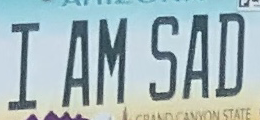

Plate Number: IAM Shd
Confidence: 0.21

State: 
Confidence: 0.00


In [ ]:
import cv2
import easyocr
from google.colab.patches import cv2_imshow

def extract_license_plate_details(image): #define function
    reader = easyocr.Reader(['en']) #set to english
    result = reader.readtext(image) #read the result with details
    return result 

def crop_largest_bbox(image, result):
    largest_bbox_area = 0
    largest_bbox = None

    for prediction in result:
        bbox, text, confidence = prediction
        bbox_area = (bbox[2][0] - bbox[0][0]) * (bbox[2][1] - bbox[0][1])

        if bbox_area > largest_bbox_area:
            largest_bbox_area = bbox_area
            largest_bbox = bbox

    x1, y1 = int(largest_bbox[0][0]), int(largest_bbox[0][1])
    x2, y2 = int(largest_bbox[2][0]), int(largest_bbox[2][1])

    cropped_image = image[y1:y2, x1:x2]

    return cropped_image

#image file name
image_path = "iamsad.png"

# Read image using OpenCV
image = cv2.imread(image_path)

# Extract license plate details
result = extract_license_plate_details(image)

# Crop the largest bounding box
cropped_image = crop_largest_bbox(image, result)

# Extract license plate details from the cropped image
result_cropped = extract_license_plate_details(cropped_image)

# Display the cropped image and print the text for the largest and second largest bounding boxes
display_image_and_print_top_two_bbox_text(cropped_image, result_cropped)
